In [529]:
import pandas as pd
import matplotlib.pyplot as plt 
from imblearn.under_sampling import RandomUnderSampler
from scipy import stats
from bs4 import BeautifulSoup
import requests

In [530]:
url1 = 'measurements.csv'
url2 = 'measurements2.xlsx'

df1 = pd.read_csv(url1)
df2 = pd.read_excel(url2)

# Cleaning process: 



## Cleaning of df1 

In [531]:
df1

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [532]:
df1['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [533]:
df2['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [534]:
rows_to_remove1 = df1[df1['gas_type'] == 'SP98'].sample(n=68, random_state=42).index
rows_to_remove2 = df2[df2['gas_type'] == 'SP98'].sample(n=68, random_state=42).index

In [535]:
df1 = df1.drop(rows_to_remove1, axis=0)
df2 = df2.drop(rows_to_remove2, axis=0)

In [536]:
print(df1['gas_type'].value_counts())
print(df2['gas_type'].value_counts())

E10     160
SP98    160
Name: gas_type, dtype: int64
E10     160
SP98    160
Name: gas_type, dtype: int64


In [537]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       320 non-null    object
 1   consume        320 non-null    object
 2   speed          320 non-null    int64 
 3   temp_inside    309 non-null    object
 4   temp_outside   320 non-null    int64 
 5   specials       73 non-null     object
 6   gas_type       320 non-null    object
 7   AC             320 non-null    int64 
 8   rain           320 non-null    int64 
 9   sun            320 non-null    int64 
 10  refill liters  9 non-null      object
 11  refill gas     9 non-null      object
dtypes: int64(5), object(7)
memory usage: 32.5+ KB


In [538]:
columns_to_numeric = ['distance', 'consume', 'temp_inside', 'refill liters']

for column in columns_to_numeric:
    df1[column] = df1[column].fillna("0")
    df1[column] = df1[column].replace(",", ".", regex=True)
    df1[column] = df1[column].astype(float)



In [539]:
df1_dummies = pd.get_dummies(df1, columns=['gas_type'])


In [540]:
# df1_dummies.drop('specials', axis=1, inplace=True)


In [541]:
df1_ready = df1_dummies 

In [542]:
df1_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 387
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       320 non-null    float64
 1   consume        320 non-null    float64
 2   speed          320 non-null    int64  
 3   temp_inside    320 non-null    float64
 4   temp_outside   320 non-null    int64  
 5   specials       73 non-null     object 
 6   AC             320 non-null    int64  
 7   rain           320 non-null    int64  
 8   sun            320 non-null    int64  
 9   refill liters  320 non-null    float64
 10  refill gas     9 non-null      object 
 11  gas_type_E10   320 non-null    uint8  
 12  gas_type_SP98  320 non-null    uint8  
dtypes: float64(4), int64(5), object(2), uint8(2)
memory usage: 30.6+ KB


## Cleaned df1 

In [543]:
df1_ready.head()

,distance,consume,speed,temp_inside,temp_outside,specials,AC,rain,sun,refill liters,refill gas,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,NaN,0,0,0,45.0,E10,1,0
1,12.0,4.2,30,21.5,13,NaN,0,0,0,0.0,NaN,1,0
2,11.2,5.5,38,21.5,15,NaN,0,0,0,0.0,NaN,1,0
3,12.9,3.9,36,21.5,14,NaN,0,0,0,0.0,NaN,1,0
4,18.5,4.5,46,21.5,15,NaN,0,0,0,0.0,NaN,1,0


## Cleaning of df2

In [544]:
df2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [545]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       320 non-null    float64
 1   consume        320 non-null    float64
 2   speed          320 non-null    int64  
 3   temp_inside    309 non-null    float64
 4   temp_outside   320 non-null    int64  
 5   specials       73 non-null     object 
 6   gas_type       320 non-null    object 
 7   AC             320 non-null    int64  
 8   rain           320 non-null    int64  
 9   sun            320 non-null    int64  
 10  refill liters  9 non-null      float64
 11  refill gas     9 non-null      object 
dtypes: float64(4), int64(5), object(3)
memory usage: 32.5+ KB


In [546]:
df2.drop('specials', axis=1, inplace=True)

In [547]:
df2['refill liters'] = df2['refill liters'].fillna(0)

In [548]:
df2 = pd.get_dummies(df2, columns=['gas_type'])

## Cleaned df2

In [549]:
df2.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,refill gas,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,45.0,E10,1,0
1,12.0,4.2,30,21.5,13,0,0,0,0.0,NaN,1,0
2,11.2,5.5,38,21.5,15,0,0,0,0.0,NaN,1,0
3,12.9,3.9,36,21.5,14,0,0,0,0.0,NaN,1,0
4,18.5,4.5,46,21.5,15,0,0,0,0.0,NaN,1,0


In [550]:
df1_ready.head()

,distance,consume,speed,temp_inside,temp_outside,specials,AC,rain,sun,refill liters,refill gas,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,NaN,0,0,0,45.0,E10,1,0
1,12.0,4.2,30,21.5,13,NaN,0,0,0,0.0,NaN,1,0
2,11.2,5.5,38,21.5,15,NaN,0,0,0,0.0,NaN,1,0
3,12.9,3.9,36,21.5,14,NaN,0,0,0,0.0,NaN,1,0
4,18.5,4.5,46,21.5,15,NaN,0,0,0,0.0,NaN,1,0


## Merged DF's

In [551]:
df = pd.concat([df1_ready, df2], axis=0)

In [552]:
df['fuel_efficiency'] = df['distance'] / df['consume']

In [553]:
df['temp_diff'] = df['temp_inside'] - df['temp_outside']

In [554]:
df['km_per_liter'] = 100 / df['consume']

In [555]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,640.0,20.456875,24.568837,1.300000,11.800000,15.350000,19.000000,216.100000
consume,640.0,4.949375,1.048316,3.300000,4.300000,4.800000,5.300000,12.200000
speed,640.0,42.903125,13.957682,14.000000,33.000000,42.000000,51.000000,90.000000
temp_inside,629.0,21.529412,3.034753,0.000000,21.500000,22.000000,22.500000,25.500000
temp_outside,640.0,11.143750,7.049875,-5.000000,6.000000,10.000000,16.000000,31.000000
AC,640.0,0.071875,0.258483,0.000000,0.000000,0.000000,0.000000,1.000000
rain,640.0,0.121875,0.327397,0.000000,0.000000,0.000000,0.000000,1.000000
sun,640.0,0.075000,0.263597,0.000000,0.000000,0.000000,0.000000,1.000000
refill liters,640.0,1.121250,6.614698,0.000000,0.000000,0.000000,0.000000,45.000000
gas_type_E10,640.0,0.500000,0.500391,0.000000,0.000000,0.500000,1.000000,1.000000


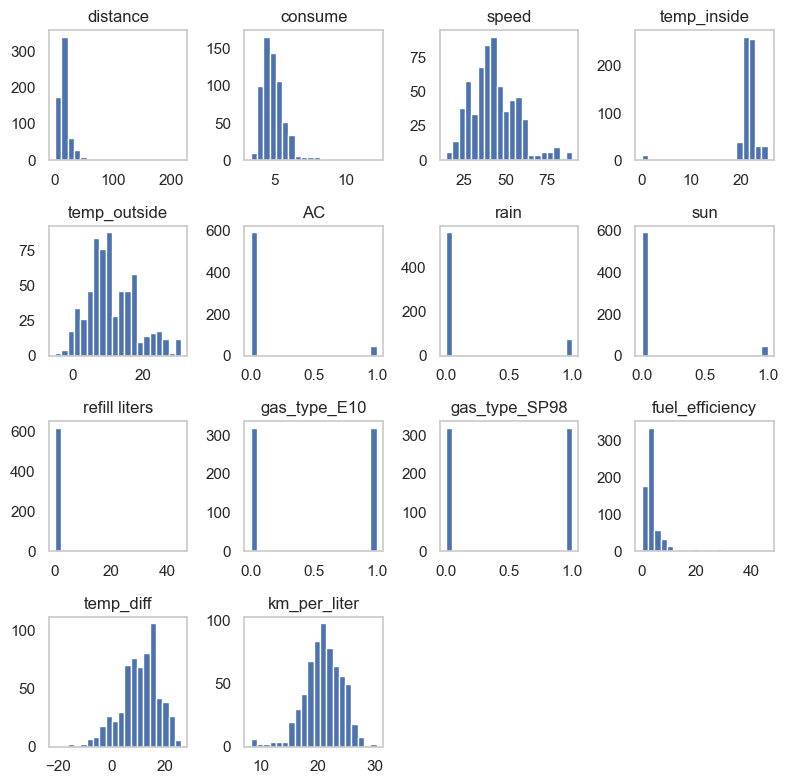

In [557]:
df.hist(figsize=(8,8), grid=False, bins=20)
plt.tight_layout()

<BarContainer object of 2 artists>

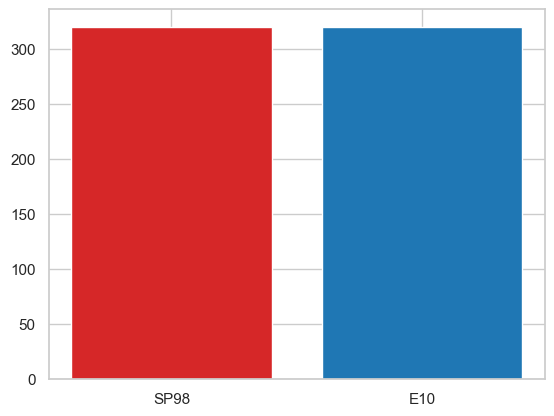

In [560]:
# counts = df_b['gas_type_SP98'].value_counts()
sp98 = len(df[df['gas_type_SP98'] == 1])
e10 = len(df[df['gas_type_E10'] == 1])


plt.bar(["SP98", "E10"], [sp98, e10], color=['tab:red', 'tab:blue'])

In [561]:
# which gas type have a better km per liter - use hypothesis testing 


## Fecthing data from online source

- Online data for different gas types and their current price in euro

- creating a dataframe from the online data

In [562]:
request = requests.get('https://autotraveler.ru/en/germany/')

print(request.status_code)
soup = BeautifulSoup(request.content)

200


In [563]:
items = soup.find_all("li", itemprop="priceSpecification") 

In [564]:
# Creating a df from online data

gas_types = [item.span.text for item in items]
gas_prices = [item.find("span", itemprop="price").text for item in items]

gas_price = pd.Series(gas_prices)
gas_type = pd.Series(gas_types)

gas_df = pd.DataFrame([gas_price, gas_type]).T
gas_df = gas_df.rename(columns={0:"price", 1:"type"})

In [565]:
gas_df

,price,type
0,1.838,E10
1,1.895,Super (95)
2,1.966,Super Plus (98)
3,1.742,Diesel
4,1.059,LPG


# Analysis


In [568]:

price_sp98 = float(gas_df[gas_df['type'] == 'Super Plus (98)'].values[0][0])
price_e10 = float(gas_df[gas_df['type'] == 'E10'].values[0][0])

# cost per 100 kilometer for each gas type
cost_per_km_sp98 = sp98 * price_sp98_per_liter 
cost_per_km_e10 = e10 * price_e10_per_liter

# which gas type have a better km per liter

avg_fuel_consumption = f_df.groupby('gas_type_E10')['consume'].mean()

sp98 = avg_fuel_consumption[0]
e10 = avg_fuel_consumption[1]




In [569]:
print(f'Cost per 100 kilometer:\n{"-"*20}\nSP98: {cost_per_km_sp98:.3} €\nE10: {cost_per_km_e10:.3} €\n\nDifference: {cost_per_km_e10 - cost_per_km_sp98:.3} €')

print(f'\n\nAvg Liter per 100km:\n{"-"*20}\nSP98: {sp98:.3}\nE10: {e10:.3}\n\nDifference: {e10-sp98:.3} ')

Cost per 100 kilometer:
--------------------
SP98: 9.61 €
E10: 9.06 €

Difference: -0.549 €


Avg Liter per 100km:
--------------------
SP98: 4.89
E10: 4.93

Difference: 0.0418 


In [595]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
# Salling did not produce better results

X = df[['distance', 'speed', 'rain', 'sun', 'AC']]  
y = df['consume']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Mean Squared Error:", mse)

# Interpret coefficients
coefficients = dict(zip(X.columns, model.coef_))
print("Coefficients:", coefficients)


R-squared: 0.07163318562141474
Mean Squared Error: 0.7616868936525083
Coefficients: {'distance': 0.002187368597816319, 'speed': -0.019899781559797502, 'rain': 0.7522042011762998, 'sun': -0.4101703396267231, 'AC': 0.23825169907583016}


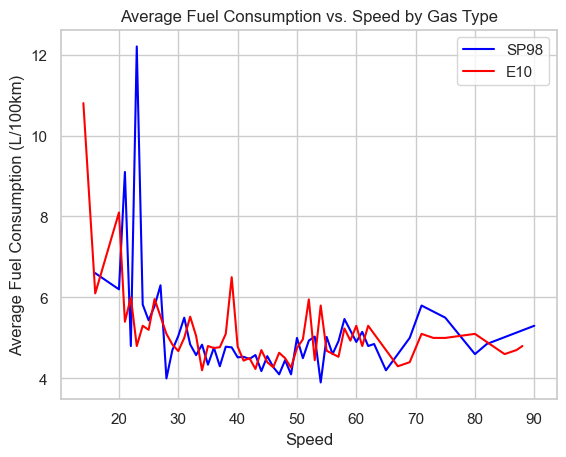

In [597]:
avg_fuel_sp98 = df[df['gas_type_SP98'] == 1].groupby('speed')['consume'].mean()
avg_fuel_e10 = df[df['gas_type_SP98'] == 0].groupby('speed')['consume'].mean()

plt.plot(avg_fuel_sp98.index, avg_fuel_sp98.values, label='SP98', color='blue')
plt.plot(avg_fuel_e10.index, avg_fuel_e10.values, label='E10', color='red')

plt.xlabel('Speed')
plt.ylabel('Average Fuel Consumption (L/100km)')
plt.title('Average Fuel Consumption vs. Speed by Gas Type')
plt.legend()
plt.grid(True)
plt.show()


## Conclusions 

judging by the results above we can see the following:

- SP98 have a better fuel efficency with 4.88 per 100km vs the E10 consuming on average 0.04 more fuel per 100km (4.93)

- E10 on the otherhand is more cost effiective as its cheaper than the SP98 

- Using linear reggersion and coefficients calcualtion we can see the following: 


    <font color='red'>        For the 'distance' variable, the coefficient is approximately 0.0021. This suggests that for every unit increase in distance (e.g., 1 km), fuel consumption is expected to increase by approximately 0.00218 liters per 100 km.</font>


    <font color='red'> For the 'speed' variable, the coefficient is approximately -0.0198. This indicates that for every unit increase in speed (e.g., 1 km/h), fuel consumption is expected to       decrease by approximately 0.0198 liters per 100 km. This negative coefficient suggests that higher speeds lead to lower fuel consumption, which is counterintuitive and may need further investigation.</font>


     <font color='red'>       Rainy conditions have the highest impact on fuel consumption with 0.7522</font>
        
    <font color='red'>        For the 'sun' variable, the coefficient is approximately -0.4101. This suggests that sunny weather conditions are associated with lower fuel consumption</font>
        
    <font color='red'>        With AC on coefficient is 0.2382 (another counterintuitive result). </font>
        

- We can see that both gas types performing poorly in term of average fuel consumption in low speeds and become more efficent between 29 to 65


Conclusion:

The high impact of rain on fuel consumption can be connected to lower speed driving, which can be seen in the graph above, to have high impact on feul consumption.

Best speed to fuel consumption are between 29-65 for both gas types. 
